# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# run this
!pip list

Package                       Version
----------------------------- ---------------
affine                        2.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.1.1
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asdf                          2.15.1
asdf-astropy                  0.4.0
asdf-coordinates-schemas      0.2.0
asdf-standard                 1.0.3
asdf-transform-schemas        0.3.0
asdf-unit-schemas             0.1.0
asdf-wcs-schemas              0.1.1
astroali

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [2]:
import pandas as pd
dataset_1 = pd.read_csv('dataset1.csv')
display(dataset_1.head())

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

<Axes: xlabel='Longitude', ylabel='Latitude'>

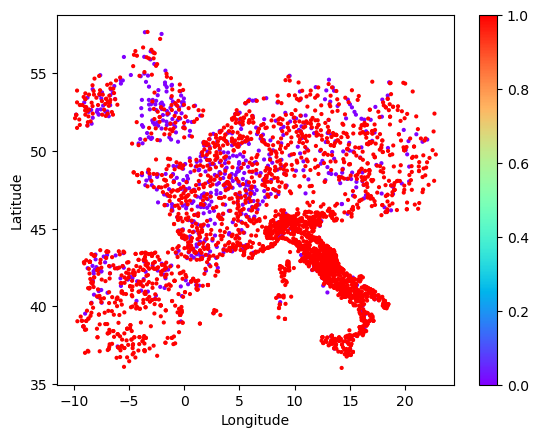

In [3]:
dataset_1.plot.scatter(x = 'Longitude', y = 'Latitude', c=dataset_1['Monastery_index'], cmap = 'rainbow', s = 4)


3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0.5, 1.0, 'Starting year')

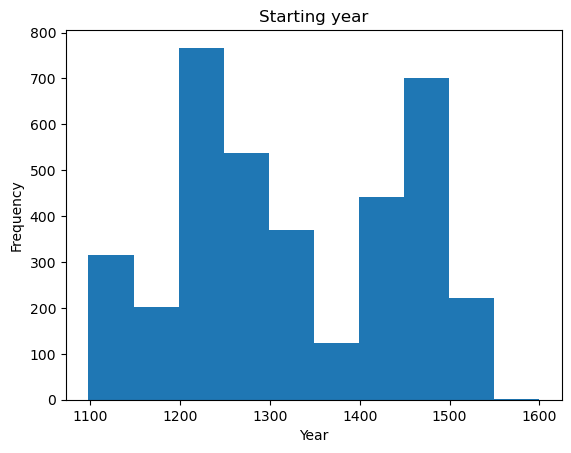

In [4]:
import matplotlib.pyplot as plt
plt.hist(dataset_1['Starting'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Starting year')


4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

Text(0.5, 1.0, 'Starting year')

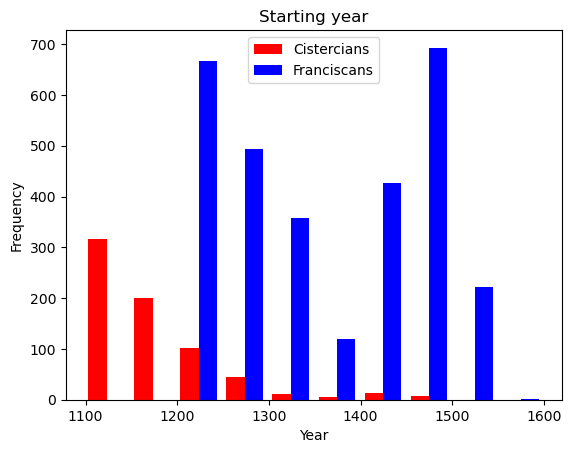

In [5]:
colors = ['red', 'blue']
labels = ['Cistercians', 'Franciscans']
plt.hist([dataset_1[dataset_1['Monastery'] == 'Cistercians']['Starting'], dataset_1[dataset_1['Monastery'] == 'Franciscans']['Starting']], color=colors, label=labels)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.title('Starting year')

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

Text(0.5, 1.0, 'Ending year')

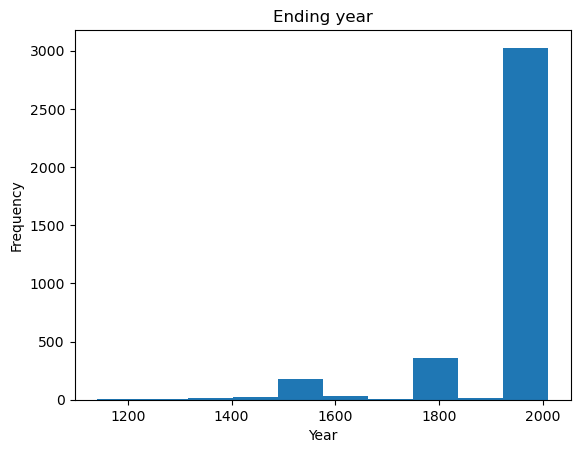

In [6]:
plt.hist(dataset_1['Ending'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Ending year')

Text(0.5, 1.0, 'Ending year')

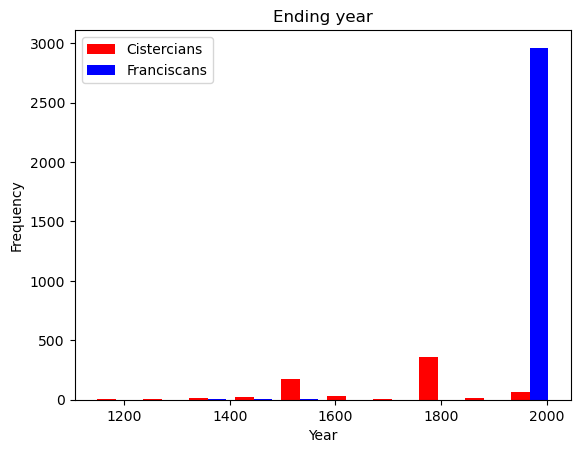

In [7]:
plt.hist([dataset_1[dataset_1['Monastery'] == 'Cistercians']['Ending'], dataset_1[dataset_1['Monastery'] == 'Franciscans']['Ending']], color=colors, label=labels)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.title('Ending year')

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

Text(0, 0.5, 'Frequency')

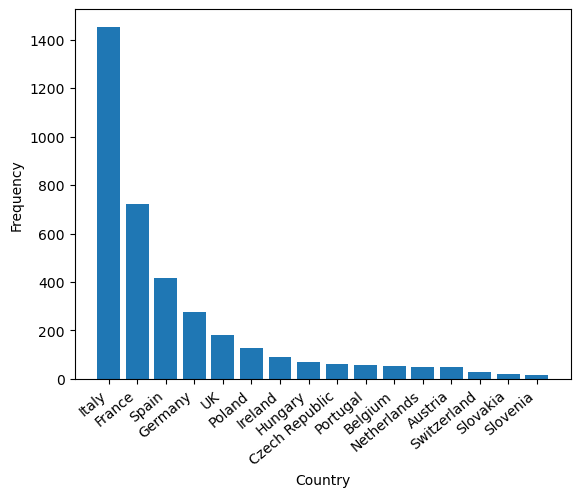

In [8]:
country_counts = dataset_1['Country'].value_counts()
country_names = country_counts.index
plt.bar(country_names, country_counts)
plt.xticks(rotation = 40, ha = 'right')
plt.xlabel('Country')
plt.ylabel('Frequency')

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [9]:
X = dataset_1[['Starting', 'Ending']]
y = dataset_1['Monastery_index']

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

0.19851729818780894
0.8039702233250621
0.9959016393442623
0.8014827018121911
0.8897025171624714


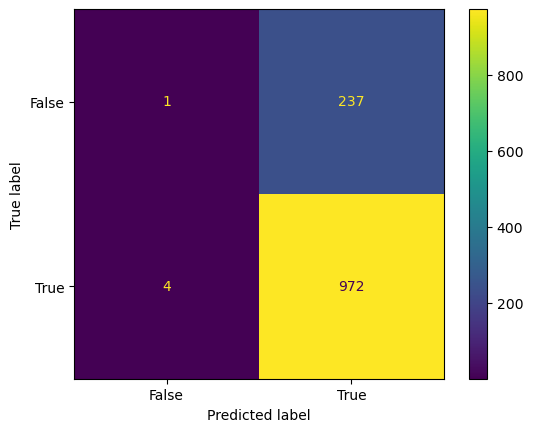

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_predicted = perceptron.predict(X_test)
fraction = 1 - (accuracy_score(y_test, y_predicted))
print(fraction)
cm = confusion_matrix(y_test, y_predicted)
cm_display = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cm_display.plot()
precision = precision_score(y_test, y_predicted, zero_division=1.0) 
print(precision)
recall = recall_score(y_test, y_predicted, zero_division=1.0)
print(recall)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
F1 = f1_score(y_test, y_predicted, zero_division=1.0)
print(F1)

10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

0.021416803953871466
0.9817444219066938
0.9918032786885246
0.9785831960461285
0.9867482161060144


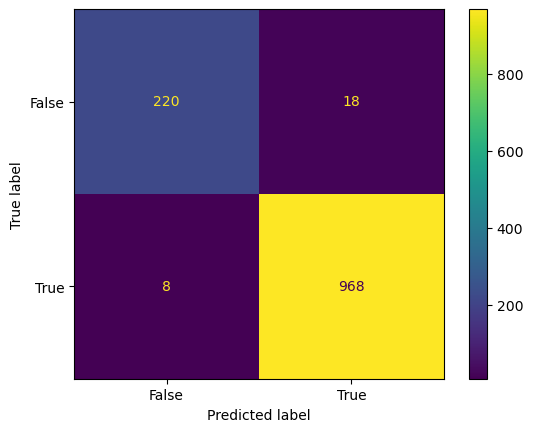

In [12]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_predicted = logistic_regression.predict(X_test)
fraction = 1 - (accuracy_score(y_test, y_predicted))
print(fraction)
cm = confusion_matrix(y_test, y_predicted)
cm_display = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cm_display.plot()
precision = precision_score(y_test, y_predicted, zero_division=1.0) 
print(precision)
recall = recall_score(y_test, y_predicted)
print(recall)
accuracy = accuracy_score(y_test, y_predicted, zero_division=1.0)
print(accuracy)
F1 = f1_score(y_test, y_predicted, zero_division=1.0)
print(F1)

For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

The train-test split is crucial for model evaluation in machine learning. The training data is used for your model to actively 'learn' per say and the testing data is what is actually used to evaluate your model where you see what the model predicts and compare it to the testing data set. You need a good split to prevent overfitting or underfitting where your model might become too specialised in the data you've provided it in the training set or it might actually be underspecialised where it wasn't able to 'learn' much. Hence, when you provide it with new data, it is incapable of generalising well to it. A bad split might also lead you to believe that your model is performing better or worse than you anticipated and you start to think it's not a good model when in reality, it's just a quick fix where you change the parameters of the train-test split.


12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

Logistic Regression performed better at this task. It has a 98% accuracy rate compared to 81% for Perceptron(from the first time that this code has been run). The figures are similar for precision, but the Perceptron did slightly better at recall than Logistic Regression; 100% compared to 99.5%. However, looking at the F1 score, Logistic Regression did much better; 99% compared to 89% for Perceptron and F1 combines both recall and precision. Therefore, judging by F1 score and accuracy rate, it is clear to see Logistic Regression performed better at the task.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

The scores do change but not overwhelmingly; just slightly. This is probably due to me not setting a value to 'random_state' in my code as 'random_state' helps in reproducing the same results when running the code. The slight change in results also come from the random nature of some of the processes in my code, for example when the algorithm runs the train-test split on the data set, the data might be getting shuffled differently every time it runs.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='density', ylabel='pH'>

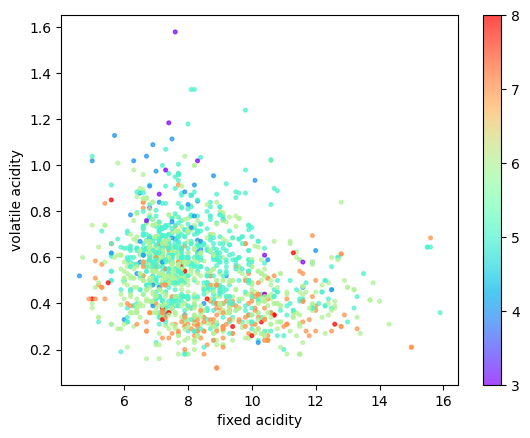

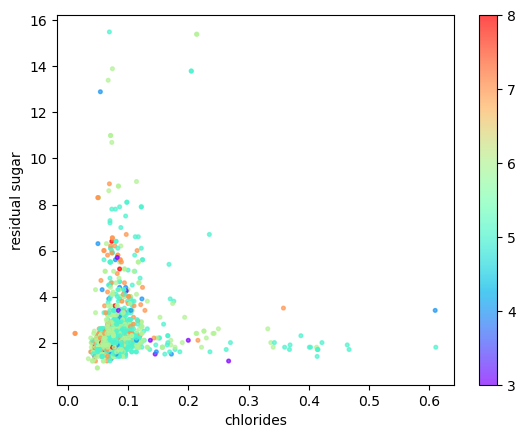

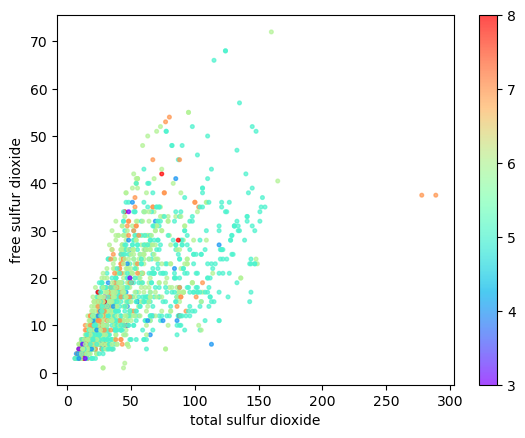

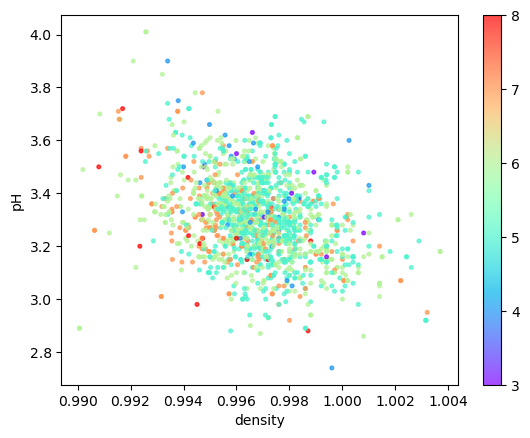

In [13]:
dataset_2 = pd.read_csv('dataset2.csv')
display(dataset_2.head())
dataset_2.plot.scatter(x = 'fixed acidity', y = 'volatile acidity', c=dataset_2['quality'], cmap = 'rainbow', s = 7, alpha = 0.7)
dataset_2.plot.scatter(x = 'chlorides', y = 'residual sugar', c=dataset_2['quality'], cmap = 'rainbow', s = 7, alpha = 0.7)
dataset_2.plot.scatter(x = 'total sulfur dioxide', y = 'free sulfur dioxide', c=dataset_2['quality'], cmap = 'rainbow', s = 7, alpha = 0.7)
dataset_2.plot.scatter(x = 'density', y = 'pH', c=dataset_2['quality'], cmap = 'rainbow', s = 7, alpha = 0.7)

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [14]:
import scipy.stats
correlation_1, p_value1 = scipy.stats.pearsonr(dataset_2['fixed acidity'], dataset_2['volatile acidity'])
correlation_2, p_value2 = scipy.stats.pearsonr(dataset_2['chlorides'], dataset_2['residual sugar'])
correlation_3, p_value3 = scipy.stats.pearsonr(dataset_2['total sulfur dioxide'], dataset_2['free sulfur dioxide'])
correlation_4, p_value4 = scipy.stats.pearsonr(dataset_2['density'], dataset_2['pH'])
print(f"Pearson correlation coefficient for 'fixed acidity' and 'volatile acidity': {correlation_1}")
print(f"Pearson correlation coefficient for 'chlorides' and 'residual sugar': {correlation_2}")
print(f"Pearson correlation coefficient for 'total sulfur dioxide' and 'free sulfur dioxide': {correlation_3}")
print(f"Pearson correlation coefficient for 'density' and 'pH': {correlation_4}")


Pearson correlation coefficient for 'fixed acidity' and 'volatile acidity': -0.2561308947703821
Pearson correlation coefficient for 'chlorides' and 'residual sugar': 0.055609535203532165
Pearson correlation coefficient for 'total sulfur dioxide' and 'free sulfur dioxide': 0.6676664504810216
Pearson correlation coefficient for 'density' and 'pH': -0.3416993347850309


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [15]:
from sklearn.linear_model import LinearRegression
X = dataset_2[['volatile acidity', 'residual sugar', 'density']]
y = dataset_2['quality']
linear_regression = LinearRegression()
linear_regression.fit(X, y)
print("R2 score: ", linear_regression.score(X, y))
print("Slope: ", linear_regression.coef_)
print("Intercept: ", linear_regression.intercept_)


R2 score:  0.18640843688498465
Slope:  [-1.74266272e+00  4.82426642e-02 -8.40085827e+01]
Intercept:  90.16863271889136


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [16]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
k_fold = KFold(n_splits = 10, shuffle = True)
cross_validation = cross_val_score(linear_regression, X, y, cv = k_fold, scoring = 'r2')
print("Mean R2 scores: ", np.mean(cross_validation))
print("Standard deviation of R2 scores: ", np.std(cross_validation))



Mean R2 scores:  0.17096165808457323
Standard deviation of R2 scores:  0.048354279542875536


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

Depends on which column is being added. If the added column is relevant and is linked to the other variables, the R2 score should be higher since the linear regression would have a better fit so more of the variance in the y-variable would be explained by the linear regression. However, it might be that the column might have no relevance but it just has similar data points. For example - 'sulphates' has similar data points but it might not be linked to the other columns that have been used in the X variable.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

In the linear regression case, if the model is much more simpler to interpret and use, the R2 with 0.80 might be preferred. This is because the amount of complication in the model to get a less than proportional increase in R2 might not be worth it.  In the case of classifiers, the one with 80% accuracy might be preferable if it has fewer false positives or negatives than the one with 90% accuracy. This could be because the model that is more desirable at the time is the one with a low classification error.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646


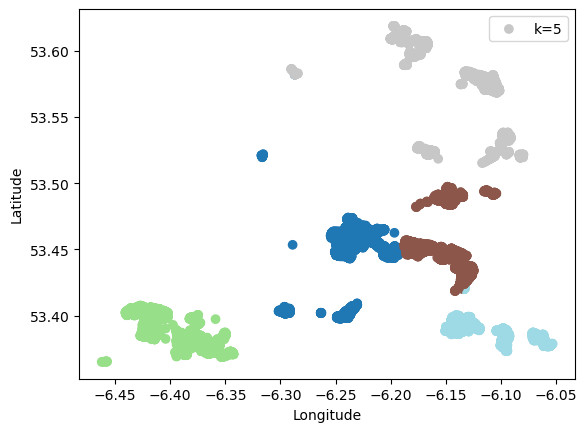

Silhouette score is: 0.5965218962328492
Davies-Bouldin score is: 0.5866790297891941


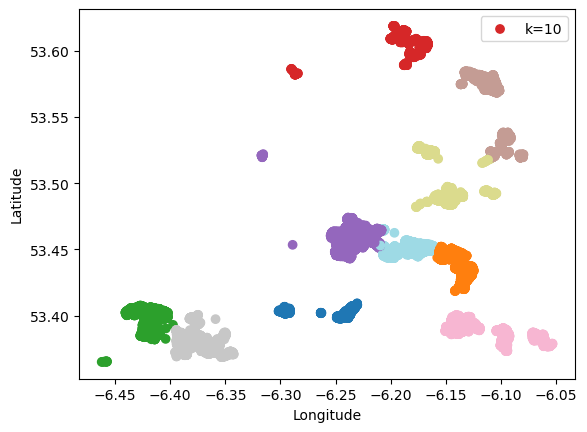

Silhouette score is: 0.6238810815116729
Davies-Bouldin score is: 0.5333471646345858


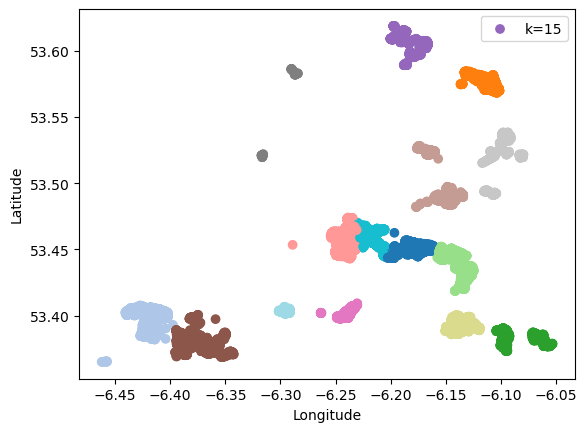

Silhouette score is: 0.6396537385410049
Davies-Bouldin score is: 0.4577836278854892


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
dataset_3 = pd.read_csv('dataset3.csv')
display(dataset_3.head())
X = dataset_3[['Longitude', 'Latitude']]
k_values = [5, 10, 15]
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 10)
    labels_1 = kmeans.fit_predict(X)
    plt.scatter(dataset_3['Longitude'], dataset_3['Latitude'], c = labels_1, cmap = 'tab20', label=f'k={k}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()
    print(f"Silhouette score is: {silhouette_score(X, labels_1)}")
    print(f"Davies-Bouldin score is: {davies_bouldin_score(X, labels_1)}")



21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

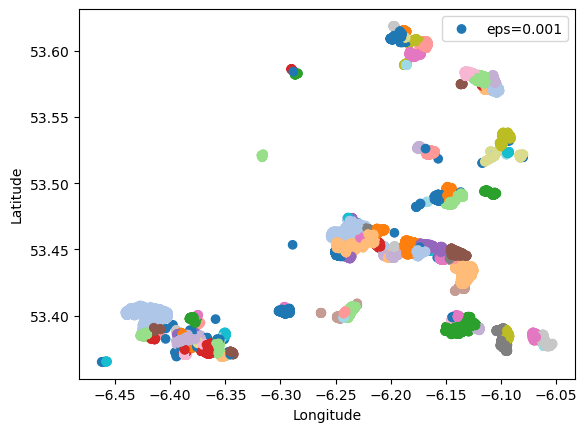

Silhouette score is: 0.24654779192083012
Davies-Bouldin score is: 1.3049809967309858


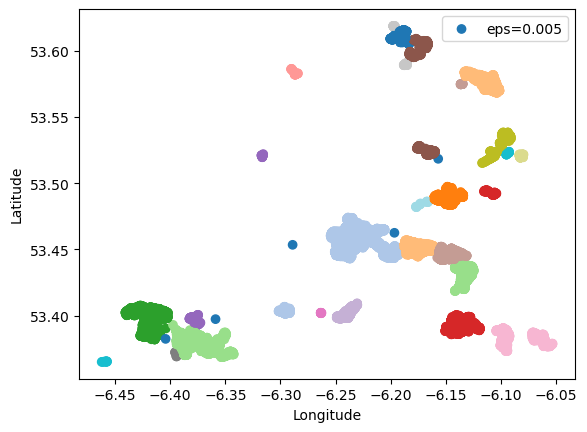

Silhouette score is: 0.5407076619494855
Davies-Bouldin score is: 0.8701655710038124


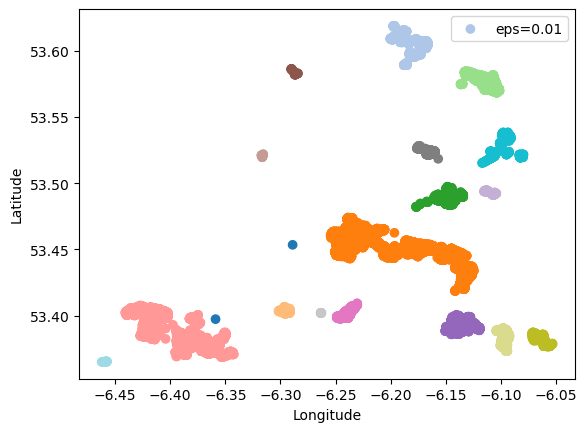

Silhouette score is: 0.393094609216659
Davies-Bouldin score is: 0.5967046437435546


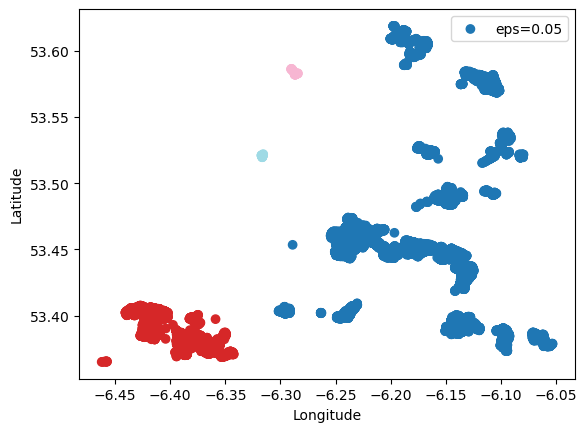

Silhouette score is: 0.4388338080434463
Davies-Bouldin score is: 0.4451886348997588


In [18]:
from sklearn.cluster import DBSCAN
eps_values = [0.001, 0.005, 0.01, 0.05]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_2 = dbscan.fit_predict(X)
    plt.scatter(dataset_3['Longitude'], dataset_3['Latitude'], c = labels_2, cmap = 'tab20', label=f'eps={eps}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()
    print(f"Silhouette score is: {silhouette_score(X, labels_2)}")
    print(f"Davies-Bouldin score is: {davies_bouldin_score(X, labels_2)}")


22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [24]:
#The K-means algorithm with k = 15 produced the best clustering according to the Silhouette scores. Based on the current run, K-means has a score of 0.6396537385410049 which outweighs all the other scores. 

23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [25]:
#The result alternates in different runs of the algorithms. It alternates between K-means with K=15 and DBSCAN with eps=0.05. But whichever is better according to the Davies-Bouldin score is only slightly better. Based on the current run, DBSCAN is better with a score of 0.4451886348997588 compared to K-means' score of 0.4577836278854892.

24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

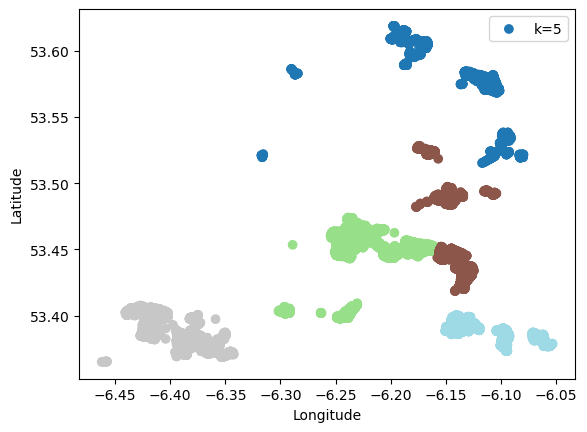

Silhouette score is: 0.5797926764830008
Davies-Bouldin score is: 0.6239010143358971


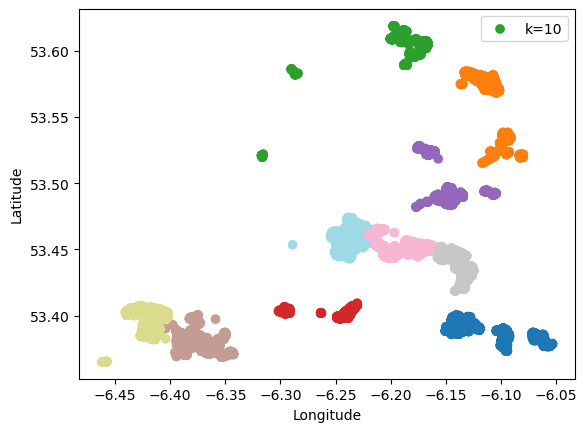

Silhouette score is: 0.6014323833756507
Davies-Bouldin score is: 0.550122109785105


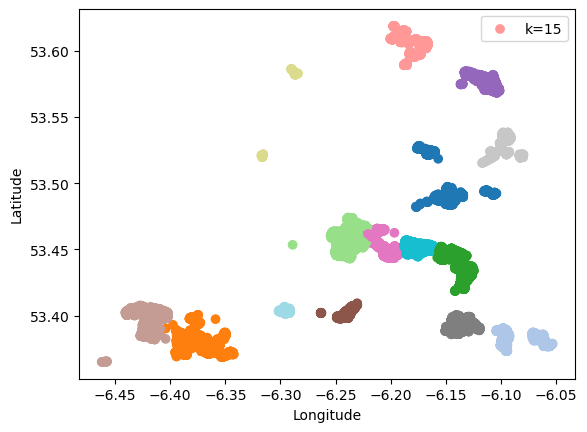

Silhouette score is: 0.6504158325592889
Davies-Bouldin score is: 0.4361702688602424


In [26]:
from sklearn.cluster import AgglomerativeClustering
k_values = [5, 10, 15]
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    labels_3 = ac.fit_predict(X)
    plt.scatter(dataset_3['Longitude'], dataset_3['Latitude'], c = labels_3, cmap = 'tab20', label=f'k={k}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()
    print(f"Silhouette score is: {silhouette_score(X, labels_3)}")
    print(f"Davies-Bouldin score is: {davies_bouldin_score(X, labels_3)}")


#According to the Silhouette and Davies-Bouldin scores, the Aggolomerative Clustering with k = 15 produced better clustering than the K-means and DBSCAN models. Based on the current run, it produced a Silhouette score of 0.6504158325592889 and a Davies-Bouldin score of 0.4361702688602424.


25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

DBSCAN is a density-based algorithm which involved searching neigbourhoods for each data point. The eps parameter gives the algorithm the maximum distance between two data points to be considered in the same neighbourhood. On the other hand, K-means is a centroid-based algorithm which involves iterations to reassign centroid positions to best align with the nearest datapoints. Therefore, DBSCAN takes longer to run because it has more complicated arithmetic computations than K-means. A smaller eps for DBSCAN means that the algorithm will have to be more precise in its search for neighbouring datapoints leading to longer run time.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

One case where it might be better to use DBSCAN is detecting fraud in online transactions. Because DBSCAN can identify clusters of data effectively within a neighbourhood so it can detect any anomalies easily; any data not beloging to the neighbourhood will be classed as an outlier which will make it easy to detect fraud because fraudulent activities typically involves activities that are not in the pattern of the usual consumer behaviour. K-means being a centroid based approach might not be able to detect anomalies as easily hence making DBSCAN better.

One case where K-means might be better is targeted marketing to consumers. This is because K-means can be effective in segmenting people based on similar preferences; the centroid-based approach helps to form clusters based around the same tendencies in shopping online or watching Youtube videos for example. Furthemore, because the clusters are formed around centroids, companies can easily interpret the characteristics of a certain group of people with similar preferences which is important to target them with specific marketing strategies. So, K-means should be more effective than DBSCAN as DBSCAN has a density based approach rather a centroid based one.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

In the case of A, adding more training examples to the data set is not going to make much of a difference because the gap between the error of the training and testing data sets is already quite narrow meaning the model is already quite a good fit. On the other hand, in the case of B, adding more training examples to the data set should make the model better as the model should learn to generalise better hence the error for the training data set should reduce so the gap between the error of the training and testing data set should continue getting narrower.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

Models A and B are quite similar in the fact that the gap between the error of the training set and the testing set is quite narrow. This means that the models are neither underfitting nor overfitting which is a postitive aspect of both of them. However, B is a better model as the error steadies at a much lower level than model A. Regardless, the bias-variance trade off is not much of an issue for them because the models neither have high variance nor high bias as they are neither underfitting or overfitting as mentioned before. Model C on the other hand has an issue of the bias-variance trade off as the gap between the error of the training and testing set is quite large. This means that the model has high variance and is overfitting the data meaning it's making a good fit for the training data set however it's making a bad fit for the testing data set evidently seen by the low and high error levels respectively.   

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

Overfitting is when a machine learning model fits a training data set so well that it fails to fit a testing data set. This means that it only gets used to the data provided in the training data set so it is unable to generalise to any new data provided to it. This is usually caused by the model having too many degrees of freedom where there are just too many parameters in the model. This is problematic since it means the model will be no good for any new data provided to it essentially making the model ineffective. One can avoid it simply by increasing the size of the training data set or using techniques such as K-fold cross validation so that the model can get trained on multiple subsets of the data.

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

Advantages of PCA include the fact that it's effective in preserving global structure as it captures the directions of maximum variance; it's also computationally effective and it deals well with high dimensional data and outputs low dimensional data which is what is desired. 
Disadvantages include the fact that it only works well with linear relationships; also if the variables are equally important and uncorrelated, using PCA would essentially be pointless as it would be uninformative.

Advantages of using t-SNE are that it preserves local structure and it does well in creating clusters from the data and making visualisations of very high dimensional data in low dimensions. It's also designed to capture data in non-linear relationships which is also another advantage.
Disadvantages of using t-SNE is that it is sensitive to its hyperparameters so improperly tuning them might intorduce artifacts in its visual output. Furthermore, the x and y axis of t-SNE are nearly impossible to interpret and cluster sizes provide no relevant information at all.

UMAP is very similar to t-SNE but its advantages are that it preserves both local and global structures that is the distance between the clusters and it also runs faster than t-SNE and uses less memory.
The disadvantages of UMAP are also very similar to the ones of t-SNE. It's very dependent on its hyperparameters and the distance between clusters also provide no relevant information. Another problem of both UMAP and t-SNE is that it can be forced into any shape with enough parameters.

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

The choice to do the preprocessing depends on what is required for the machine learning task. For example - PCA might be chosen if stability is key for the task as PCA is of a determinisitic nature hence provides consistent results across runs meaning the results are reproducible. PCA is also the best out of the three when it comes to computational efficiency which is going to be crucial during the preprocessing stage. However, if the focus is on non linear relationships, then UMAP becomes a good choice as it's more computationally efficient than t-SNE and it also preserves both global and local structures which t-SNE is unable to do however the stochastic nature of UMAP might become problematic as the visual results will not be reproducible.

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

A balance between interpretability and stability is desirable in most cases in the choice of dimensionality reduction technique for both tasks. However, in certain cases such as medical industries, interpretability might be more important than stability so PCA might be preferred over other techniques as it provides linear transformation which is easier to interpret than a non linear transformtion. Likewise, if more stability is required to get consistent results across runs, then PCA might still be favorable due to its deterministic nature so its results are reproducible.
The stochastic nature of t-SNE and UMAP mean that it's difficult to reproduce the same results consistently. Different runs on the same data will probably produce different visual outputs which obviously negatively impacts their stability.
PCA's linear assumptions limit its usefulness in capturing complex relationships in the data because it won't be able to detect trends in non linear relationships and hence would not be effecitive in reducing the dimensions of the data.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

A scenario as such could be a spam email classifier. Only 1% of the emails might be spam and the classifier always classifies the emails as non spam hence it has a 99% accuracy rate but this is obviously misleading. One metric I would consider is recall where a high rate of recall would mean the classifier is correctly identifying spam emails most of the time but a low recall would mean there are a lot of false negatives where the classifier thinks it's not spam but it is. This would be helpful as those emails can be further investigated to find out why the classifier is not being able to correctly identify them as spam.

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

Because of the trade off between precision and recall. Precison is the ratio of true positives to the sum of true positives and false positives whereas recall is the ratio of true positives to the sum of true positives and false negatives. Hence, if you make a classifier more lenient in its decision making, you will be able to increase recall but probably have a lower precision in the process as the classifier might falsely classify something as positive as its more lenient increasing the number of false positives. In the case of making the classifier more conservative, you will be able to increase precision but it will come at the cost of lowering recall as the classifier may miss some true positives and classify them as negatives instead. 

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

In the case of a medical scenario where a classifier is assigned to detect a new disease, high recall will be preferable over precision. This is because early detection of the disease will be crucial in diagnosing it and high recall ensures as that as many true positive cases as possible are identified which will come at the cost of low precision so there could be a few cases of false positives but the false positives can easily be detected by conducting some further tests on the patient whereas a false negative in this case could be detrimental to the patient so the trade off is worth it. An example where high precision would be preferred is in cricket if a classifier is assigned the task of detecting no balls. This is because a high precision would mean that there will be fewer false positives so less legal balls will be classified as a no ball saving the fielding team from giving away an extra run and a ball. This will come at the cost of a lower recall meaning more no balls will be passed on as legal balls but the impact from a legal ball getting classified as a no ball is more harmful to the fielding team than the impact from a no ball getting classified as a legal ball is to the batting team in most cases.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

An example would be an image classification algorithm for animals. It might achieve high accuracy when it classifies dogs but low accuracy when classifying other animals such as pandas. This could be because of the lack of diversity in the training data set it was trained on. It could be that most of the training data set consisted of pictures of dogs hence it's unable to generalise when tested on classifying other animals so when it sees a panda the algorithm fails to detect it and says it's a dog instead. An easy way to diagnose that would be to simply include different kinds of animals in the training data set so the algorithm can adapt to them.

37. Give an example of a machine learning algorithm that might have low errorin its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

An example could be a facial recognition algorithm for access to systems in the workplace. The model could have low error in training and testing datasets but a fundamental flaw it might have is the existence of bias against certain demographics based on gender and race which error metrics can't necessarily perceive. For example - the algorithm might have higher false positives or false negatives when it comes to recognising black women in the workplace. This could be because the training and testing datasets didn't necessarily have a proportionate representation of people of different demographics so a quick solution for that is to simply diversify the training and testing datasets with more people from different backgrounds. Another solution could be to incorporate fairness evalution metrics such as demographics parity so that any bias from the algorithm can be identified and removed.

_________________